# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress
from scipy import stats

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

611

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Base URL for GET requests to retrieve number/date facts
url = "http://api.openweathermap.org/data/2.5/weather?"
# requesting temp in farenheit 
units="imperial"

city_data = [] 
#Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="
index = 0
print("Beginning Data Retrieval\n")
print("-------------------------------\n")
for city in cities:
    weather_response = requests.get(query_url + city)
    weather_json = weather_response.json()  
    # print(json.dumps(weather_json, indent=4))
    index+=1
    try:
        print(f"Processing Record {index} of {len(cities)} | Name:{city}, Id:{weather_json['id']}")
        
        city_data.append({"City":city,"Lat":weather_json['coord']['lat'],
                          "Lng":weather_json['coord']['lon'],
                          "Max Temp":weather_json['main']['temp_max'],"Humidity":weather_json['main']['humidity'],
                          "Cloudiness":weather_json['clouds']['all'],
                          "Wind Speed":weather_json['wind']['speed'],"Country":weather_json['sys']['country'],
                          "Date":weather_json['dt']
                         })
    except: 
        print("City not found. Skipping")
    


Beginning Data Retrieval

-------------------------------

Processing Record 1 of 611 | Name:iqaluit, Id:5983720
City not found. Skipping
Processing Record 3 of 611 | Name:sitka, Id:5557293
Processing Record 4 of 611 | Name:provideniya, Id:4031574
Processing Record 5 of 611 | Name:ancud, Id:3899695
Processing Record 6 of 611 | Name:talara, Id:3691582
Processing Record 7 of 611 | Name:tiznit, Id:2527087
Processing Record 8 of 611 | Name:fortuna, Id:5563839
Processing Record 9 of 611 | Name:port alfred, Id:964432
Processing Record 10 of 611 | Name:ilo, Id:3938415
Processing Record 11 of 611 | Name:yellowknife, Id:6185377
Processing Record 12 of 611 | Name:ushuaia, Id:3833367
Processing Record 13 of 611 | Name:nur, Id:763513
Processing Record 14 of 611 | Name:hermanus, Id:3366880
Processing Record 15 of 611 | Name:biak, Id:1637001
Processing Record 16 of 611 | Name:rikitea, Id:4030556
City not found. Skipping
Processing Record 18 of 611 | Name:jamestown, Id:5122534
Processing Record 19 of

Processing Record 154 of 611 | Name:pangnirtung, Id:6096551
Processing Record 155 of 611 | Name:longkou, Id:1802550
City not found. Skipping
Processing Record 157 of 611 | Name:camana, Id:3945985
Processing Record 158 of 611 | Name:nouakchott, Id:2377450
Processing Record 159 of 611 | Name:mbala, Id:176146
Processing Record 160 of 611 | Name:cambados, Id:3126899
Processing Record 161 of 611 | Name:la palma, Id:5364022
Processing Record 162 of 611 | Name:mahebourg, Id:934322
Processing Record 163 of 611 | Name:faanui, Id:4034551
Processing Record 164 of 611 | Name:chapleau, Id:5919915
Processing Record 165 of 611 | Name:saint-philippe, Id:935215
Processing Record 166 of 611 | Name:tevriz, Id:1489661
Processing Record 167 of 611 | Name:arona, Id:2521582
Processing Record 168 of 611 | Name:corinto, Id:259289
Processing Record 169 of 611 | Name:belmonte, Id:3470137
Processing Record 170 of 611 | Name:aklavik, Id:5882953
Processing Record 171 of 611 | Name:nome, Id:5870133
Processing Record

Processing Record 305 of 611 | Name:padang, Id:1633419
Processing Record 306 of 611 | Name:berlevag, Id:780687
Processing Record 307 of 611 | Name:praia, Id:3374333
Processing Record 308 of 611 | Name:oshnaviyeh, Id:121795
Processing Record 309 of 611 | Name:meybod, Id:124193
City not found. Skipping
Processing Record 311 of 611 | Name:cuamba, Id:1047660
Processing Record 312 of 611 | Name:hay river, Id:5972762
Processing Record 313 of 611 | Name:banjar, Id:1650232
Processing Record 314 of 611 | Name:asau, Id:686090
Processing Record 315 of 611 | Name:ust-nera, Id:2120048
Processing Record 316 of 611 | Name:westport, Id:4845585
Processing Record 317 of 611 | Name:ciudad guayana, Id:3645528
Processing Record 318 of 611 | Name:atikokan, Id:5888001
Processing Record 319 of 611 | Name:ulladulla, Id:2145554
Processing Record 320 of 611 | Name:kulunda, Id:1501460
Processing Record 321 of 611 | Name:nandurbar, Id:1261931
Processing Record 322 of 611 | Name:bandarbeyla, Id:64814
Processing Rec

Processing Record 457 of 611 | Name:longyan, Id:1802276
Processing Record 458 of 611 | Name:vardo, Id:777019
Processing Record 459 of 611 | Name:waterloo, Id:6176823
Processing Record 460 of 611 | Name:huadian, Id:2036776
Processing Record 461 of 611 | Name:avera, Id:4231997
Processing Record 462 of 611 | Name:hofn, Id:2630299
Processing Record 463 of 611 | Name:plettenberg bay, Id:964712
Processing Record 464 of 611 | Name:temba, Id:989747
City not found. Skipping
Processing Record 466 of 611 | Name:beringovskiy, Id:2126710
Processing Record 467 of 611 | Name:canaries, Id:2593110
Processing Record 468 of 611 | Name:utete, Id:149070
Processing Record 469 of 611 | Name:yanam, Id:1252795
City not found. Skipping
Processing Record 471 of 611 | Name:tarko-sale, Id:1490085
Processing Record 472 of 611 | Name:kerema, Id:2094144
Processing Record 473 of 611 | Name:birao, Id:240210
Processing Record 474 of 611 | Name:pimentel, Id:3693584
Processing Record 475 of 611 | Name:kungurtug, Id:150137

Processing Record 610 of 611 | Name:axim, Id:2303611
Processing Record 611 of 611 | Name:laguna, Id:5364271


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
#displaying in dataframe 
df_cities = pd.DataFrame(city_data)
#Export the city data into a CSV
df_cities.to_csv("cities_updated.csv",index_label="City_ID")
df_cities.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,iqaluit,63.7506,-68.5145,31.73,80,90,17.00,CA,1635043762
1,sitka,57.0531,-135.3300,48.09,66,90,11.50,US,1635043743
2,provideniya,64.3833,-173.3000,24.26,78,100,8.68,RU,1635043780
3,ancud,-41.8697,-73.8203,48.42,77,82,9.42,CL,1635043756
4,talara,-4.5772,-81.2719,66.18,84,92,14.99,PE,1635044200


In [7]:
#descibing the statistical information of the DATA
df_cities.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,556.000000,556.000000,556.000000,556.000000,556.000000,556.000000,5.560000e+02
mean,18.485269,14.298183,59.904299,72.129496,55.250000,7.538885,1.635044e+09
std,33.026638,89.702480,19.820210,20.201538,39.207102,5.561301,2.426550e+02
min,-54.800000,-175.200000,-5.240000,15.000000,0.000000,0.000000,1.635043e+09
25%,-8.134575,-67.638025,46.615000,63.000000,13.000000,3.225000,1.635044e+09
50%,21.090500,20.463900,62.590000,76.000000,67.500000,5.840000,1.635044e+09
75%,45.163775,91.918925,75.980000,88.000000,95.000000,11.277500,1.635044e+09
max,78.218600,179.316700,98.370000,100.000000,100.000000,32.140000,1.635044e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
df_cities_filtered = df_cities[df_cities['Humidity'] <= 100]
df_cities_filtered

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,iqaluit,63.7506,-68.5145,31.73,80,90,17.00,CA,1635043762
1,sitka,57.0531,-135.3300,48.09,66,90,11.50,US,1635043743
2,provideniya,64.3833,-173.3000,24.26,78,100,8.68,RU,1635043780
3,ancud,-41.8697,-73.8203,48.42,77,82,9.42,CL,1635043756
4,talara,-4.5772,-81.2719,66.18,84,92,14.99,PE,1635044200
...,...,...,...,...,...,...,...,...,...
551,maria aurora,15.7967,121.4737,75.38,98,100,0.63,PH,1635044318
552,suluq,31.6682,20.2521,70.11,40,49,13.20,LY,1635044319
553,warah,27.4481,67.7978,76.17,38,0,7.85,PK,1635044319
554,axim,4.8699,-2.2405,76.57,87,70,2.21,GH,1635044319


In [9]:
# Humidity does not pass one-hundred (so data is filtered correctly)
df_cities_filtered.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,556.000000,556.000000,556.000000,556.000000,556.000000,556.000000,5.560000e+02
mean,18.485269,14.298183,59.904299,72.129496,55.250000,7.538885,1.635044e+09
std,33.026638,89.702480,19.820210,20.201538,39.207102,5.561301,2.426550e+02
min,-54.800000,-175.200000,-5.240000,15.000000,0.000000,0.000000,1.635043e+09
25%,-8.134575,-67.638025,46.615000,63.000000,13.000000,3.225000,1.635044e+09
50%,21.090500,20.463900,62.590000,76.000000,67.500000,5.840000,1.635044e+09
75%,45.163775,91.918925,75.980000,88.000000,95.000000,11.277500,1.635044e+09
max,78.218600,179.316700,98.370000,100.000000,100.000000,32.140000,1.635044e+09


In [10]:
#  Get the indices of cities that have humidity over 100%.
#Observation no city has a humidity level over 100%
df_cities_filtered[df_cities_filtered['Humidity'] > 100].index

Int64Index([], dtype='int64')

In [11]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = df_cities.drop(df_cities[df_cities['Humidity'] > 100].index, inplace=False)
clean_city_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,iqaluit,63.7506,-68.5145,31.73,80,90,17.00,CA,1635043762
1,sitka,57.0531,-135.3300,48.09,66,90,11.50,US,1635043743
2,provideniya,64.3833,-173.3000,24.26,78,100,8.68,RU,1635043780
3,ancud,-41.8697,-73.8203,48.42,77,82,9.42,CL,1635043756
4,talara,-4.5772,-81.2719,66.18,84,92,14.99,PE,1635044200


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

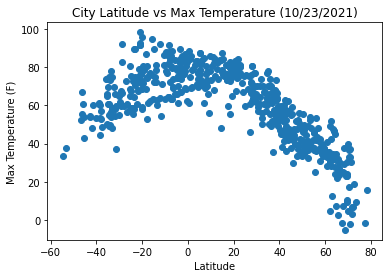

In [12]:
x_values = clean_city_data['Lat']
y_values = clean_city_data['Max Temp']

# Perform a linear regression on temperature vs. latitude
#(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
#regress_values = x_values * slope + intercept
#print(regress_values)

plt.title("City Latitude vs Max Temperature (10/23/2021)")
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.show()

#observation:   Countries with a negative latitude seem to have a higher temperature. Once the Latitude becomes positive the 
#the temperature begins to drop. 

## Latitude vs. Humidity Plot

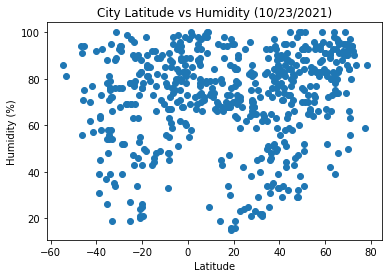

In [13]:
x_values = clean_city_data['Lat']
y_values = clean_city_data['Humidity']

# Perform a linear regression on temperature vs. latitude
#(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
#regress_values = x_values * slope + intercept
#print(regress_values)

plt.title("City Latitude vs Humidity (10/23/2021)")
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.show()

#Observation: I cannot find any correlation within the data when it comes to latitude vs Humidity.  
#The plots seem to be everywhere and have no bearing on each other.


## Latitude vs. Cloudiness Plot

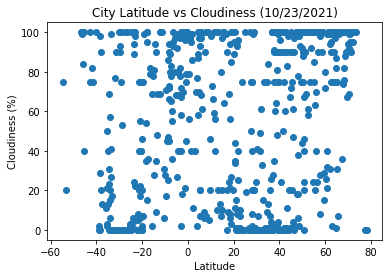

In [14]:
x_values = clean_city_data['Lat']
y_values = clean_city_data['Cloudiness']

# Perform a linear regression on temperature vs. latitude
#(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
#regress_values = x_values * slope + intercept
#print(regress_values)

plt.title("City Latitude vs Cloudiness (10/23/2021)")
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.show()

#Observation: I cannot find any correlation within the data when it comes to latitude vs cloudiness.
#The plots seem to be everywhere and have no bearing on each other.


## Latitude vs. Wind Speed Plot

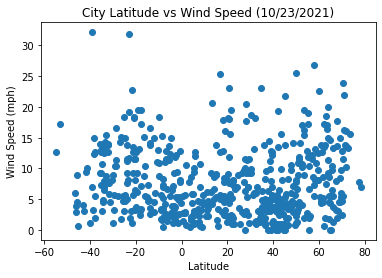

In [15]:
x_values = clean_city_data['Lat']
y_values = clean_city_data['Wind Speed']

# Perform a linear regression on temperature vs. latitude
#(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
#regress_values = x_values * slope + intercept
#print(regress_values)

plt.title("City Latitude vs Wind Speed (10/23/2021)")
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.show()

#Observation:  The city latitude seems to be pretty equal but when the
#latitude becomes positive the windspeeds seem to be lower and dense in that quadrant. 

## Linear Regression

In [16]:
# Create Regression Equation
# Perform a linear regression on temperature vs. latitude
# Northern Hemisphere (greater than or equal to 0 degrees latitude) and 
# Southern Hemisphere (less than 0 degrees latitude)

# query to get to the  northern and Southern hemisphere 
nothern_hemi_data = clean_city_data[clean_city_data['Lat'] >= 0]
southern_hemi_data = clean_city_data[clean_city_data['Lat'] < 0]




####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

Regression Equation is y = -0.92x +90.11

The r-value is: 0.7931347877944727


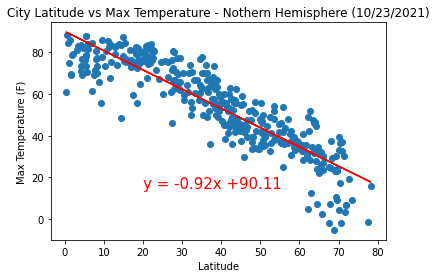

In [17]:
#Northern Hemisphere 
x_values = nothern_hemi_data['Lat']
y_values = nothern_hemi_data['Max Temp']
(slope, intercept, rvalue, pv1alue, stderr) = stats.linregress(x_values, y_values)

#regression equation 
regression_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(f'Regression Equation is {regression_eq}\n')
# Get regression values
regress_values = x_values * slope + intercept

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.annotate(regression_eq,(20,15),fontsize=15,color="red")
plt.title("City Latitude vs Max Temperature - Nothern Hemisphere (10/23/2021)")
# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()
# observation show that in the negative latitude values the higher the temperature
#and when the latitude becomes positive the low the max temperature is.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

Regression Equation is y = 0.59x +81.94

The r-value is: 0.37973908039323084


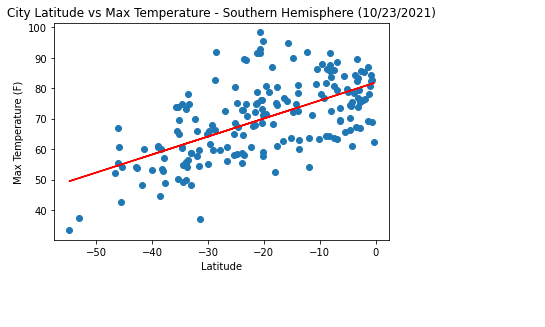

In [18]:

#Southern Hemisphere 

x_values = southern_hemi_data['Lat']
y_values = southern_hemi_data['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Regression Equation:
regression_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(f'Regression Equation is {regression_eq}\n')
# Get regression values
regress_values = x_values * slope + intercept

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title("City Latitude vs Max Temperature - Southern Hemisphere (10/23/2021)")
plt.annotate(regression_eq,(10,5),fontsize=12,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

#observation: This shows me a positive line in correlation between max temp and the latitude.
#lower temp seem to get higher as they latitude moves up.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Regression Equation is y = 0.15x +67.55

The r-value is: 0.021425285592988404


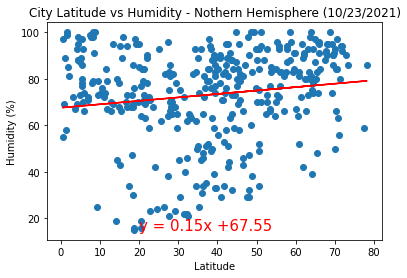

In [19]:
# Northern Hemisphere humidity vs latitude
x_values = nothern_hemi_data['Lat']
y_values = nothern_hemi_data['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

#regression equation
regression_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(f'Regression Equation is {regression_eq}\n')
# Get regression values
regress_values = x_values * slope + intercept

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.annotate(regression_eq,(20,15),fontsize=15,color="red")
plt.title("City Latitude vs Humidity - Nothern Hemisphere (10/23/2021)")
# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

#Observation:I see a steady line obetween humidity of 60 to 70 percent and slight growth of the latitude That shows a relationship


####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Regression Equation is y = 0.25x +75.15

The r-value is: 0.027554238820055487


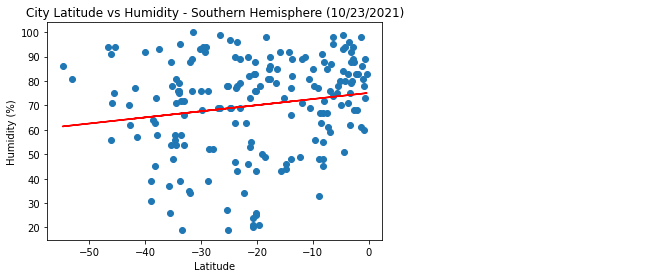

In [20]:
#Southern Hemisphere humidity 
x_values = southern_hemi_data['Lat']
y_values = southern_hemi_data['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

#regression equation:
regression_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(f'Regression Equation is {regression_eq}\n')
# Get regression values
regress_values = x_values * slope + intercept

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title("City Latitude vs Humidity - Southern Hemisphere (10/23/2021)")
plt.annotate(regression_eq,(25,20),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

 #Observation: No correlation between the variables 

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Regression Equation is y = 0.4x +41.27

The r-value is: 0.03969446658737771


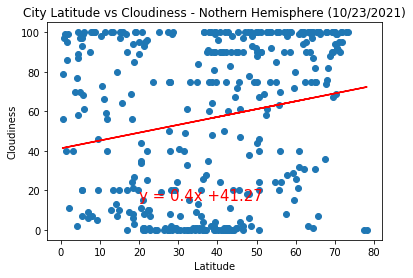

In [21]:
x_values = nothern_hemi_data['Lat']
y_values = nothern_hemi_data['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)


regression_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(f'Regression Equation is {regression_eq}\n')
# Get regression values
regress_values = x_values * slope + intercept

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.annotate(regression_eq,(20,15),fontsize=15,color="red")
plt.title("City Latitude vs Cloudiness - Nothern Hemisphere (10/23/2021)")
# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

# No correlation between the variables 

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Regression Equation is y = 0.75x +68.21

The r-value is: 0.06992469855805446


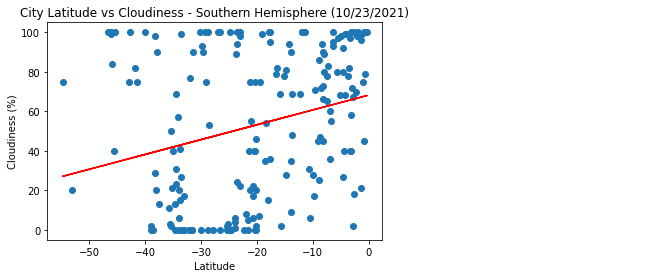

In [22]:
#Southern Hemisphere 
x_values = southern_hemi_data['Lat']
y_values = southern_hemi_data['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)


regression_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(f'Regression Equation is {regression_eq}\n')
# Get regression values
regress_values = x_values * slope + intercept

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title("City Latitude vs Cloudiness - Southern Hemisphere (10/23/2021)")
plt.annotate(regression_eq,(25,20),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

# Observation shows no correlation between the Variables. 

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Regression Equation is y = 0.06x +4.69

The r-value is: 0.052943183974359466


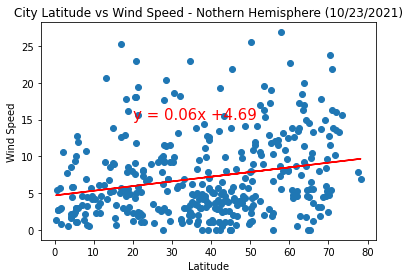

In [23]:
x_values = nothern_hemi_data['Lat']
y_values = nothern_hemi_data['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)


regression_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(f'Regression Equation is {regression_eq}\n')
# Get regression values
regress_values = x_values * slope + intercept

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.annotate(regression_eq,(20,15),fontsize=15,color="red")
plt.title("City Latitude vs Wind Speed - Nothern Hemisphere (10/23/2021)")
# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

#Obeservation:  There is no correlation between the variables. 

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Regression Equation is y = -0.08x +6.73

The r-value is: 0.03751685300531332


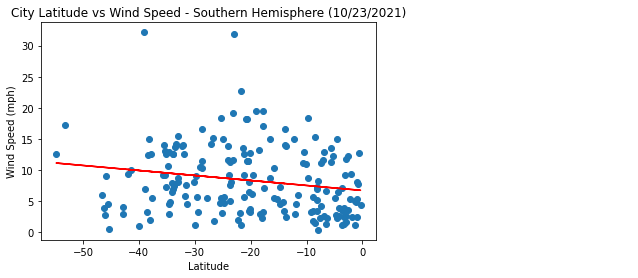

In [24]:
x_values = southern_hemi_data['Lat']
y_values = southern_hemi_data['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)


regression_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(f'Regression Equation is {regression_eq}\n')
# Get regression values
regress_values = x_values * slope + intercept

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title("City Latitude vs Wind Speed - Southern Hemisphere (10/23/2021)")
plt.annotate(regression_eq,(25,20),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

#observation show negative correlation of the variables 